In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Alle .pkl-Dateien im aktuellen Arbeitsverzeichnis finden
pkl_files = [f for f in os.listdir() if not f.endswith(".ipynb")]

In [46]:
df_list = []
for file in pkl_files:
    df = pd.read_pickle(file)

    # Dateiname ohne Pfad und Endung als Modellname
    modellname = os.path.splitext(os.path.basename(file))[0]

    # Neue Spalte anhängen
    df["Modell"] = modellname

    if modellname == 'TorchNN': # states sind One-Hot encoded
        # 1. Alle Zeilen mit 'state_' filtern
        state_rows = df[df['feature'].str.startswith('state_')]

        # 2. Eine neue Zeile erzeugen (Durchschnitt über alle state_-Zeilen)
        state_avg = state_rows.max(numeric_only=True)
        state_avg['feature'] = 'state'
        state_avg['Modell'] = modellname
        print(state_avg)

        # 3. Alle state_-Zeilen entfernen
        df = df[~df['feature'].str.startswith('state_')]

        # 4. Neue Zeile anhängen
        df = pd.concat([df, pd.DataFrame([state_avg])], ignore_index=True)

    # In Liste aufnehmen
    df_list.append(df)

# Alle zusammenfügen, falls du einen großen DataFrame willst
df_all = pd.concat(df_list, ignore_index=True)


importance_mean    0.025008
importance_std     0.001655
feature               state
Modell              TorchNN
dtype: object


In [40]:

df_all

,feature,importance_mean,importance_std,Modell
0,source_RentDigs.com,-0.000129,0.000111,cluster_regressor
1,sauna,0.000000,0.000000,cluster_regressor
2,source_Andere source,0.000021,0.000028,cluster_regressor
3,source_RealRentals,0.000227,0.000093,cluster_regressor
4,source_RentLingo,0.000286,0.000137,cluster_regressor
...,...,...,...,...
103,bedrooms,0.031503,0.001632,XGBoost
104,bathrooms,0.100090,0.003760,XGBoost
105,square_feet,0.308863,0.004290,XGBoost
106,cityname,0.512429,0.005608,XGBoost


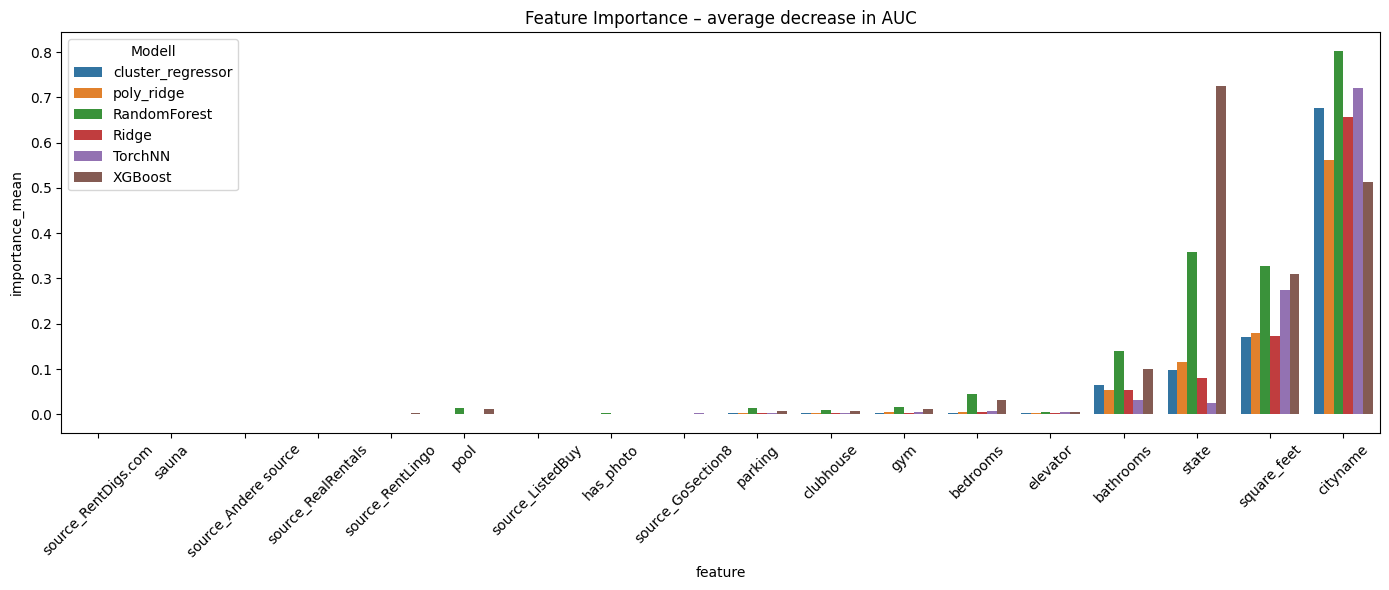

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.barplot(
    data=df_all,
    x="feature",
    y="importance_mean",
    hue="Modell"
)

plt.title("Feature Importance – average decrease in AUC")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
